<a href="https://colab.research.google.com/github/simsekergun/DATA601/blob/main/Project1/DATA601_Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## DATA 601 Project-1 (Spring 2023)
### Deadline: April 3rd, 11:59 pm
Please download these the csv files <br>
File-1: Maryland Statewide Vehicle Crashes:  <br>
https://opendata.maryland.gov/Public-Safety/Maryland-Statewide-Vehicle-Crashes/65du-s3qu

File-2: Person Details:  <br>
https://opendata.maryland.gov/Public-Safety/Maryland-Statewide-Vehicle-Crashes-Person-Details-/py4c-dicf

File-3: Vehicle Details:  <br>
https://opendata.maryland.gov/Public-Safety/Maryland-Statewide-Vehicle-Crashes-Vehicle-Details/mhft-5t5y

<br>

We will only use "Accident Year = 2020" data. So, please remove all the unncessary rows. Names these files as "crashes.csv", "persons.csv", and "vehicles.csv", respetively. I will test your notebook with the files I created, so if you have a different naming, your code won't work.

### Q1
From these three csv files, create a single dataframe which will include following columns only <br>
- from the "crashes.csv", accident data (acc_dat), accident time (acc_time), weather description (weather_desc),report no, county (county_desc), latittude, and longitude
- from the "persons.csv", gender, data of birth, and state code
- from the "vehicles.csv", vehicle year, vehicle make, speed limit
<br>

Save your dataframe as a new csv file called "md_crash_2020.csv".

Note: All these csv files have the 'REPORT_NO' column. You need to use that column to combine these datasets.

In [1]:
import pandas as pd
df1 = pd.read_csv('Maryland_Statewide_Vehicle_Crashes.csv')
df2 = pd.read_csv('Maryland_Statewide_Vehicle_Crashes_-_Person_Details__Anonymized_.csv')
df3 = pd.read_csv('Maryland_Statewide_Vehicle_Crashes_-_Vehicle_Details.csv')

/var/folders/22/6j0j1vld7_b0h7y9l2w28mj80000gn/T/ipykernel_99476/1303555666.py:2: DtypeWarning: Columns (33,45) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('Maryland_Statewide_Vehicle_Crashes.csv')
/var/folders/22/6j0j1vld7_b0h7y9l2w28mj80000gn/T/ipykernel_99476/1303555666.py:3: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv('Maryland_Statewide_Vehicle_Crashes_-_Person_Details__Anonymized_.csv')


In [2]:
df1.head()

,YEAR,QUARTER,LIGHT_DESC,LIGHT_CODE,COUNTY_DESC,COUNTY_NO,MUNI_DESC,MUNI_CODE,JUNCTION_DESC,JUNCTION_CODE,...,FEET_MILES_FLAG_DESC,FEET_MILES_FLAG,DISTANCE_DIR_FLAG,REFERENCE_NO,REFERENCE_TYPE_CODE,REFERENCE_SUFFIX,REFERENCE_ROAD_NAME,LATITUDE,LONGITUDE,LOCATION
0,2020,Q2,Daylight,1.00,Baltimore,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.277263,-76.503693,POINT (-76.5036932 39.27726285)
1,2022,Q2,Dark Lights On,3.00,Montgomery,15.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.992210,-77.097021,POINT (-77.097020666667 38.9922095)
2,2020,Q4,NaN,6.02,Baltimore,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.323620,-76.503080,POINT (-76.503080116667 39.323620083333)
3,2022,Q1,Daylight,1.00,Baltimore,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.411213,-76.628028,POINT (-76.628028425147 39.411213105087)
4,2022,Q2,Dark Lights On,3.00,Queen Anne's,17.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.974880,-76.281090,POINT (-76.28109 38.97488)


In [3]:
df1 = df1[df1['YEAR'] == 2020]

In [4]:
df1['YEAR'].value_counts()

2020    94207
Name: YEAR, dtype: int64

In [5]:
columns_df1 = ['ACC_DATE','ACC_TIME','WEATHER_DESC','REPORT_NO', 'COUNTY_DESC', 'LATITUDE', 'LONGITUDE' ]
df1 = df1[columns_df1]
df1.head()

,ACC_DATE,ACC_TIME,WEATHER_DESC,REPORT_NO,COUNTY_DESC,LATITUDE,LONGITUDE
0,20200618,15:15:00,Not Applicable,AE58770052,Baltimore,39.277263,-76.503693
2,20201027,17:50:00,NaN,AE63330016,Baltimore,39.323620,-76.503080
5,20200430,06:39:00,NaN,ADJ984001J,Baltimore City,39.311025,-76.616429
8,20200504,09:46:00,NaN,EJ7878001D,Montgomery,39.140680,-77.193413
18,20201204,21:45:00,Raining,AE5739006G,Baltimore,39.316200,-76.738446


In [6]:
columns_df2 = ['SEX_DESC', 'DATE_OF_BIRTH', 'LICENSE_STATE_CODE','REPORT_NO']
columns_df3 = ['SPEED_LIMIT', 'VEH_YEAR', 'VEH_MAKE', 'REPORT_NO']
df2 = df2[columns_df2]
df3 = df3[columns_df3]

In [7]:
md_crash_2020 = df3.merge(df1, on= 'REPORT_NO', how = 'inner').merge(df2,on = 'REPORT_NO', how = 'inner')
md_crash_2020.to_csv("md_crash_2020.csv")
md_crash_2020.shape

(411747, 13)

### Q2
a. For each county, determine the average age of the drivers who were involved in these accidents  <br>
b. Then list the sorted averages (from youngest to oldest) <br>

In [8]:
md_crash_2020 = md_crash_2020.dropna(subset = ["DATE_OF_BIRTH"])

In [9]:
md_crash_2020.head()

,SPEED_LIMIT,VEH_YEAR,VEH_MAKE,REPORT_NO,ACC_DATE,ACC_TIME,WEATHER_DESC,COUNTY_DESC,LATITUDE,LONGITUDE,SEX_DESC,DATE_OF_BIRTH,LICENSE_STATE_CODE
2,55,2018.0,TOYOTA,MSP7221001P,20200605,12:22:00,NaN,Prince George's,38.989139,-76.883444,Male,19570320.0,NaN
3,55,2018.0,TOYOTA,MSP7221001P,20200605,12:22:00,NaN,Prince George's,38.989139,-76.883444,Female,19691001.0,MD
4,55,2018.0,TOYOTA,MSP7221001P,20200605,12:22:00,NaN,Prince George's,38.989139,-76.883444,Female,19651005.0,NY
5,55,2018.0,TOYOTA,MSP7221001P,20200605,12:22:00,NaN,Prince George's,38.989139,-76.883444,Male,19570320.0,NaN
6,55,2018.0,TOYOTA,MSP7221001P,20200605,12:22:00,NaN,Prince George's,38.989139,-76.883444,Male,19860715.0,NH


In [10]:
md_crash_2020 = df3.merge(df1, on= 'REPORT_NO', how = 'inner').merge(df2,on = 'REPORT_NO', how = 'inner')
md_crash_2020.to_csv("md_crash_2020.csv")
md_crash_2020['DATE_OF_BIRTH'] = pd.to_datetime(md_crash_2020['DATE_OF_BIRTH'],format='%Y%m%d')
md_crash_2020.head()

,SPEED_LIMIT,VEH_YEAR,VEH_MAKE,REPORT_NO,ACC_DATE,ACC_TIME,WEATHER_DESC,COUNTY_DESC,LATITUDE,LONGITUDE,SEX_DESC,DATE_OF_BIRTH,LICENSE_STATE_CODE
0,25,NaN,UNKNOWN,AE5057004X,20200528,11:40:00,Not Applicable,Baltimore,39.245577,-76.702305,NaN,NaT,NaN
1,25,2005.0,CHEVY,AE5057004X,20200528,11:40:00,Not Applicable,Baltimore,39.245577,-76.702305,NaN,NaT,NaN
2,55,2018.0,TOYOTA,MSP7221001P,20200605,12:22:00,NaN,Prince George's,38.989139,-76.883444,Male,1957-03-20,NaN
3,55,2018.0,TOYOTA,MSP7221001P,20200605,12:22:00,NaN,Prince George's,38.989139,-76.883444,Female,1969-10-01,MD
4,55,2018.0,TOYOTA,MSP7221001P,20200605,12:22:00,NaN,Prince George's,38.989139,-76.883444,Female,1965-10-05,NY


In [11]:
md_crash_2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 411747 entries, 0 to 411746
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   SPEED_LIMIT         411747 non-null  int64         
 1   VEH_YEAR            393097 non-null  float64       
 2   VEH_MAKE            411725 non-null  object        
 3   REPORT_NO           411747 non-null  object        
 4   ACC_DATE            411747 non-null  int64         
 5   ACC_TIME            411747 non-null  object        
 6   WEATHER_DESC        99162 non-null   object        
 7   COUNTY_DESC         411745 non-null  object        
 8   LATITUDE            411747 non-null  float64       
 9   LONGITUDE           411747 non-null  float64       
 10  SEX_DESC            375058 non-null  object        
 11  DATE_OF_BIRTH       374352 non-null  datetime64[ns]
 12  LICENSE_STATE_CODE  281739 non-null  object        
dtypes: datetime64[ns](1), float64

In [12]:
md_crash_2020 = md_crash_2020.dropna(subset = 'DATE_OF_BIRTH')
md_crash_2020['Age'] = ((pd.Timestamp.now() - md_crash_2020['DATE_OF_BIRTH']).dt.days / 365.25).astype(int)
md_crash_2020.head()

,SPEED_LIMIT,VEH_YEAR,VEH_MAKE,REPORT_NO,ACC_DATE,ACC_TIME,WEATHER_DESC,COUNTY_DESC,LATITUDE,LONGITUDE,SEX_DESC,DATE_OF_BIRTH,LICENSE_STATE_CODE,Age
2,55,2018.0,TOYOTA,MSP7221001P,20200605,12:22:00,NaN,Prince George's,38.989139,-76.883444,Male,1957-03-20,NaN,66
3,55,2018.0,TOYOTA,MSP7221001P,20200605,12:22:00,NaN,Prince George's,38.989139,-76.883444,Female,1969-10-01,MD,53
4,55,2018.0,TOYOTA,MSP7221001P,20200605,12:22:00,NaN,Prince George's,38.989139,-76.883444,Female,1965-10-05,NY,57
5,55,2018.0,TOYOTA,MSP7221001P,20200605,12:22:00,NaN,Prince George's,38.989139,-76.883444,Male,1957-03-20,NaN,66
6,55,2018.0,TOYOTA,MSP7221001P,20200605,12:22:00,NaN,Prince George's,38.989139,-76.883444,Male,1986-07-15,NH,36


In [13]:
mean_age_by_county = md_crash_2020.groupby('COUNTY_DESC')['Age'].mean()
mean_age_by_county.head()

COUNTY_DESC
Allegany          42.033698
Anne Arundel      40.273208
Baltimore         40.719727
Baltimore City    38.921278
Calvert           40.017161
Name: Age, dtype: float64

In [14]:
mean_age_by_county = mean_age_by_county.sort_values()

In [15]:
print(mean_age_by_county)

COUNTY_DESC
Worcester          36.995738
Baltimore City     38.921278
Charles            38.927230
St. Mary's         39.175932
Wicomico           39.220220
Prince George's    39.228560
Garrett            39.575019
Cecil              39.823954
Caroline           39.858929
Calvert            40.017161
Howard             40.022516
Washington         40.132951
Frederick          40.198239
Somerset           40.254089
Anne Arundel       40.273208
Dorchester         40.508752
Queen Anne's       40.695321
Baltimore          40.719727
Harford            40.842445
Montgomery         41.142575
Carroll            41.539348
Kent               41.594690
Talbot             41.612261
Allegany           42.033698
Name: Age, dtype: float64


### Q3
a. Determine the total number of crashes per "vehicle make". List the sorted values (e.g. Honda, 1234)<br>
b. Determine average age of the car involved in these accidents for each "vehicle make".  <br>

In [16]:
crashes_per_make = md_crash_2020.groupby('VEH_MAKE')['VEH_MAKE'].count()

# Sort the resulting Series in descending order
crashes_per_make = crashes_per_make.sort_values(ascending=False)
print(crashes_per_make)

VEH_MAKE
FORD                 45578
HONDA                37861
TOYOTA               36756
NISSAN               25734
DODGE                14249
                     ...  
FORDF                    1
FORDA20023               1
TAMAKA                   1
TAGA                     1
JTEBU5JRXG5295138        1
Name: VEH_MAKE, Length: 2352, dtype: int64


In [17]:
import datetime
md_crash_2020 = md_crash_2020.dropna(subset = ["VEH_YEAR"])
md_crash_2020['VEH_YEAR'] = md_crash_2020['VEH_YEAR'].astype('int64')
current_year = datetime.datetime.now().year
md_crash_2020['car_age'] = current_year - md_crash_2020['VEH_YEAR']

# Group the dataframe by 'vehicle_make' and calculate the mean of 'car_age'
avg_car_age_per_make = md_crash_2020.groupby('VEH_MAKE')['car_age'].mean()
print(avg_car_age_per_make)

VEH_MAKE
00                      1356.333333
000                     2023.000000
0000                    1734.428571
00000                   2023.000000
0099                    1935.000000
                           ...     
YV4BZ982X91060431         14.000000
YY 150 TS                 17.000000
ZERO                       3.000000
ZHEJIANG                   4.000000
ZHEJIANG TAOTAO VEH.    2023.000000
Name: car_age, Length: 2352, dtype: float64


### Q4
a. Determine all the accidents that happened in a circle centered at (39.016149, -77.117942) with a radius of 5 km. Among them,  <br>
b. Determine the number of accidents where the speed limit was above 51 miles per hour. <br>
c. Determine the number of accidents where the speed limit was below 41 miles per hour.  <br>
<br>
Hint: Please see the "P1_Helper_Distance_From_Coordinates.ipynb" that can be found at https://github.com/simsekergun/DATA601/tree/main/Project1

In [18]:
import math
center_lat, center_lon = 39.016149, -77.117942
radius_km = 5

# Define a function to calculate the distance between two points using the Haversine formula
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # radius of the Earth in kilometers
    phi1 = math.radians(lat1)
    phi2 = math.radians(lat2)
    delta_phi = math.radians(lat2 - lat1)
    delta_lambda = math.radians(lon2 - lon1)
    a = math.sin(delta_phi / 2)**2 + math.cos(phi1) * math.cos(phi2) * math.sin(delta_lambda / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = R * c
    return d

# Calculate the distance between each accident location and the center of the circle
md_crash_2020['distance'] = md_crash_2020.apply(lambda row: haversine(center_lat, center_lon, row['LATITUDE'], row['LONGITUDE']), axis=1)

# Filter the accidents based on whether they fall within the radius of the circle
accidents_in_circle = md_crash_2020[md_crash_2020['distance'] <= radius_km]

# Print the resulting DataFrame
print(accidents_in_circle)

        SPEED_LIMIT  VEH_YEAR  VEH_MAKE    REPORT_NO  ACC_DATE  ACC_TIME  \
382              55      2007     HONDA  MSP692000FH  20200620  15:02:00   
383              55      2011      PTRB  MSP692000F4  20200430  16:18:00   
384              55      2011      PTRB  MSP692000F4  20200430  16:18:00   
1329             55      2018      FORD  MCP3228000P  20200404  04:30:00   
1330             55      2018      FORD  MCP3228000P  20200404  04:30:00   
...             ...       ...       ...          ...       ...       ...   
411317           35      2007     JETTA   DD5631003C  20200103  01:15:00   
411462           55      2001       BMW  MSP694200G5  20200211  04:25:00   
411494           35      2013  INFINITI  MCP16080011  20200117  21:31:00   
411635            0      2010     HONDA  MCP3070001C  20200115  17:38:00   
411636            0      2010     HONDA  MCP3070001C  20200115  17:38:00   

       WEATHER_DESC COUNTY_DESC   LATITUDE  LONGITUDE SEX_DESC DATE_OF_BIRTH  \
382    

In [19]:
len(md_crash_2020[md_crash_2020['SPEED_LIMIT'] > 51])

68785

In [20]:
len(md_crash_2020[md_crash_2020['SPEED_LIMIT'] < 41])

247484

### Q5
Download "Licensed Drivers By Sex" data from  <br>
https://github.com/simsekergun/DATA601/tree/main/Project1

a. Determine the number of drivers, who got in a car crash, from non-DMV states as a function of gender and list them <br>
`St Male Female` <br>
`NY 1510  622` <br>
`PA 1251 1312` <br>
... <br>
Note: DMV states: DC, MD, and VA  <br>
 <br>
b. Normalize the previous list with number of male drivers and female drivers for each state. e.g. There are 1 million male drivers in NY and 2 million female drivers, then the normalized numbers should be <br>
<br>
`St    Male_Norm  Female_Norm` <br>
`NY    1.510e-3  0.311e-3` <br>



In [21]:
state_drivers = pd.read_csv('states_drivers.csv')
state_drivers['STATE'].value_counts()

Alabama            1
Pennsylvania       1
Nevada             1
New Hampshire      1
New Jersey         1
New Mexico         1
New York           1
North Carolina     1
North Dakota       1
Ohio               1
Oklahoma           1
Oregon             1
Rhode Island       1
Montana            1
South Carolina     1
South Dakota       1
Tennessee          1
Texas              1
Utah               1
Vermont            1
Virginia           1
Washington         1
West Virginia      1
Wisconsin          1
Nebraska           1
Missouri           1
Alaska             1
Idaho              1
Arizona            1
Arkansas           1
California         1
Colorado           1
Connecticut        1
Delaware           1
Dist. of Col.      1
Florida            1
Georgia            1
Hawaii             1
Illinois           1
Mississippi        1
Indiana            1
Iowa               1
Kansas             1
Kentucky           1
Louisiana          1
Maine              1
Maryland           1
Massachusetts

In [22]:
non_dmnv_drivers = md_crash_2020[~md_crash_2020['LICENSE_STATE_CODE'].isin(['DC','MD','VA'])]
non_dmnv_drivers = non_dmnv_drivers.dropna()

In [23]:
non_dmnv_drivers

,SPEED_LIMIT,VEH_YEAR,VEH_MAKE,REPORT_NO,ACC_DATE,ACC_TIME,WEATHER_DESC,COUNTY_DESC,LATITUDE,LONGITUDE,SEX_DESC,DATE_OF_BIRTH,LICENSE_STATE_CODE,Age,car_age,distance
473,55,2020,INTL,MDTA1806001S,20200613,16:19:00,Not Applicable,Baltimore City,39.279992,-76.551151,Male,1980-04-19,DE,43,3,57.005307
475,55,2016,KIA,MDTA1806001S,20200613,16:19:00,Not Applicable,Baltimore City,39.279992,-76.551151,Male,1980-04-19,DE,43,7,57.005307
781,25,2010,BOBCAT,MCP11130036,20200506,11:29:00,Raining,Montgomery,39.251968,-77.225085,Male,1989-10-25,US,33,13,27.802652
783,25,2017,ROYAL ENFIELD,MCP11130036,20200506,11:29:00,Raining,Montgomery,39.251968,-77.225085,Male,1989-10-25,US,33,6,27.802652
1082,35,2004,ACURA,DA1482002G,20200617,19:25:00,Raining,Prince George's,38.939231,-76.928591,Male,1996-11-08,FL,26,19,18.467751
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411567,55,1996,FONTAINE,ZA05420015,20200123,11:25:00,Not Applicable,Allegany,39.674746,-78.718965,Male,1958-07-11,PA,64,27,155.935887
411568,55,1996,FONTAINE,ZA05420015,20200123,11:25:00,Not Applicable,Allegany,39.674746,-78.718965,Female,1985-10-09,PA,37,27,155.935887
411590,55,2018,MACK,MSP650500KT,20200115,07:13:00,Foggy,Frederick,39.438690,-77.406838,Male,1989-10-18,PA,33,5,53.167351
411658,65,2013,SUBU,MSP7060003G,20200118,14:02:00,Wintry Mix,Harford,39.500423,-76.229881,Female,1983-10-20,WA,39,10,93.518783


In [24]:
non_dmnv_drivers = non_dmnv_drivers.groupby(['LICENSE_STATE_CODE','SEX_DESC'])['REPORT_NO'].count().reset_index()
non_dmnv_drivers.rename(columns = {'REPORT_NO':'Accidents'}, inplace = True)
non_dmnv_drivers

,LICENSE_STATE_CODE,SEX_DESC,Accidents
0,AK,Female,5
1,AK,Male,5
2,AL,Female,11
3,AL,Male,9
4,AR,Female,1
...,...,...,...
110,WV,Male,191
111,XX,Female,121
112,XX,Male,497
113,XX,Unknown,88


### Q6
a. On which day of the week (Monday through Sunday) do the most of the crashes happen? <br>
b. On which hour of the day (00 - 24) do the most of the crashes happen?  <br>

In [25]:
md_crash_2020['ACC_DATE'] = pd.to_datetime(md_crash_2020['ACC_DATE'],format='%Y%m%d')
md_crash_2020

,SPEED_LIMIT,VEH_YEAR,VEH_MAKE,REPORT_NO,ACC_DATE,ACC_TIME,WEATHER_DESC,COUNTY_DESC,LATITUDE,LONGITUDE,SEX_DESC,DATE_OF_BIRTH,LICENSE_STATE_CODE,Age,car_age,distance
2,55,2018,TOYOTA,MSP7221001P,2020-06-05,12:22:00,NaN,Prince George's,38.989139,-76.883444,Male,1957-03-20,NaN,66,5,20.484678
3,55,2018,TOYOTA,MSP7221001P,2020-06-05,12:22:00,NaN,Prince George's,38.989139,-76.883444,Female,1969-10-01,MD,53,5,20.484678
4,55,2018,TOYOTA,MSP7221001P,2020-06-05,12:22:00,NaN,Prince George's,38.989139,-76.883444,Female,1965-10-05,NY,57,5,20.484678
5,55,2018,TOYOTA,MSP7221001P,2020-06-05,12:22:00,NaN,Prince George's,38.989139,-76.883444,Male,1957-03-20,NaN,66,5,20.484678
6,55,2018,TOYOTA,MSP7221001P,2020-06-05,12:22:00,NaN,Prince George's,38.989139,-76.883444,Male,1986-07-15,NH,36,5,20.484678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411742,35,2004,ACURA,CNC3160003H,2020-02-04,00:11:00,NaN,Prince George's,38.957752,-76.869146,Male,1984-03-06,NaN,39,19,22.462585
411743,35,2004,ACURA,CNC3160003H,2020-02-04,00:11:00,NaN,Prince George's,38.957752,-76.869146,Male,1978-12-26,XX,44,19,22.462585
411744,55,2017,CHEVY,ZW01540018,2020-03-25,15:10:00,Raining,Worcester,38.116357,-75.461232,Male,1969-08-08,MD,53,6,175.372428
411745,0,2007,FORD,DE3112003N,2020-01-29,14:42:00,NaN,Wicomico,38.348448,-75.591371,Female,1995-07-22,MD,27,16,151.887578


In [26]:
crashes_by_day = md_crash_2020.groupby(md_crash_2020['ACC_DATE'].dt.dayofweek)['ACC_DATE'].count()

# Map the day of the week (integer) to its name (string)
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
crashes_by_day.index = map(lambda x: day_names[x], crashes_by_day.index)

# Find the day with the most crashes
most_crashes_day = crashes_by_day.idxmax()

# Print the result
print(f"The day with the most crashes is {most_crashes_day} with {crashes_by_day[most_crashes_day]} crashes.")

The day with the most crashes is Friday with 62413 crashes.


In [27]:
md_crash_2020['ACC_TIME'] = pd.to_datetime(md_crash_2020['ACC_TIME'])

# Group the crashes by hour and count the number of crashes for each hour
crashes_by_hour = md_crash_2020.groupby(md_crash_2020['ACC_TIME'].dt.hour)['ACC_TIME'].count()

# Find the hour with the most crashes
most_crashes_hour = crashes_by_hour.idxmax()

# Print the result
print(f"The hour with the most crashes is {most_crashes_hour}:00 with {crashes_by_hour[most_crashes_hour]} crashes.")

The hour with the most crashes is 17:00 with 31409 crashes.


### Q7
Download "Maryland Average Precipitation and Snow 2020" data from  <br>
https://github.com/simsekergun/DATA601/tree/main/Project1

You need assume that it is a rainy/snowy day if the second column is bigger than 0.05 or if the third column is bigger than 1; otherwise take that day as a non-rainy/snowy day. <br>
a. What is the ratio of the number of accidents happened in rainy/snowy days to the number of accidents happened in non-rainy/snowy days? <br>
b. What does this ratio tell us?

In [28]:
df = pd.read_csv('MD2020_Rain_Snow.csv')
df['Date'] = pd.to_datetime(df['Date'])
df
df.rename(columns = {'Date':'ACC_DATE'}, inplace = True)
x = pd.merge(md_crash_2020,df, on=['ACC_DATE'], how='outer')
x

,SPEED_LIMIT,VEH_YEAR,VEH_MAKE,REPORT_NO,ACC_DATE,ACC_TIME,WEATHER_DESC,COUNTY_DESC,LATITUDE,LONGITUDE,SEX_DESC,DATE_OF_BIRTH,LICENSE_STATE_CODE,Age,car_age,distance,Precip in.,Snow in.
0,55,2018,TOYOTA,MSP7221001P,2020-06-05,2023-04-21 12:22:00,NaN,Prince George's,38.989139,-76.883444,Male,1957-03-20,NaN,66,5,20.484678,1.31,0
1,55,2018,TOYOTA,MSP7221001P,2020-06-05,2023-04-21 12:22:00,NaN,Prince George's,38.989139,-76.883444,Female,1969-10-01,MD,53,5,20.484678,1.31,0
2,55,2018,TOYOTA,MSP7221001P,2020-06-05,2023-04-21 12:22:00,NaN,Prince George's,38.989139,-76.883444,Female,1965-10-05,NY,57,5,20.484678,1.31,0
3,55,2018,TOYOTA,MSP7221001P,2020-06-05,2023-04-21 12:22:00,NaN,Prince George's,38.989139,-76.883444,Male,1957-03-20,NaN,66,5,20.484678,1.31,0
4,55,2018,TOYOTA,MSP7221001P,2020-06-05,2023-04-21 12:22:00,NaN,Prince George's,38.989139,-76.883444,Male,1986-07-15,NH,36,5,20.484678,1.31,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365681,55,2020,MAZDA,MSP694200GK,2020-03-17,2023-04-21 13:25:00,NaN,Montgomery,39.017948,-77.101033,Female,1976-10-07,MD,46,3,1.474489,0.00,0
365682,0,2004,INTERNATIONAL,MCP209400G9,2020-03-17,2023-04-21 10:53:00,NaN,Montgomery,39.012450,-77.102438,Female,1990-09-19,MD,32,19,1.401202,0.00,0
365683,55,2018,TOYOTA,MSP6915001F,2020-03-17,2023-04-21 23:20:00,NaN,Somerset,38.237676,-75.683634,Female,2006-12-12,NaN,16,5,151.710992,0.00,0
365684,55,2018,TOYOTA,MSP6915001F,2020-03-17,2023-04-21 23:20:00,NaN,Somerset,38.237676,-75.683634,Male,2000-01-05,NaN,23,5,151.710992,0.00,0


In [29]:
df.columns

Index(['ACC_DATE', 'Precip in.', 'Snow in.'], dtype='object')

In [30]:
x['rainy_snowy'] = (x['Precip in.'] > 0.05) | (x['Snow in.'] > 1)
x

,SPEED_LIMIT,VEH_YEAR,VEH_MAKE,REPORT_NO,ACC_DATE,ACC_TIME,WEATHER_DESC,COUNTY_DESC,LATITUDE,LONGITUDE,SEX_DESC,DATE_OF_BIRTH,LICENSE_STATE_CODE,Age,car_age,distance,Precip in.,Snow in.,rainy_snowy
0,55,2018,TOYOTA,MSP7221001P,2020-06-05,2023-04-21 12:22:00,NaN,Prince George's,38.989139,-76.883444,Male,1957-03-20,NaN,66,5,20.484678,1.31,0,True
1,55,2018,TOYOTA,MSP7221001P,2020-06-05,2023-04-21 12:22:00,NaN,Prince George's,38.989139,-76.883444,Female,1969-10-01,MD,53,5,20.484678,1.31,0,True
2,55,2018,TOYOTA,MSP7221001P,2020-06-05,2023-04-21 12:22:00,NaN,Prince George's,38.989139,-76.883444,Female,1965-10-05,NY,57,5,20.484678,1.31,0,True
3,55,2018,TOYOTA,MSP7221001P,2020-06-05,2023-04-21 12:22:00,NaN,Prince George's,38.989139,-76.883444,Male,1957-03-20,NaN,66,5,20.484678,1.31,0,True
4,55,2018,TOYOTA,MSP7221001P,2020-06-05,2023-04-21 12:22:00,NaN,Prince George's,38.989139,-76.883444,Male,1986-07-15,NH,36,5,20.484678,1.31,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365681,55,2020,MAZDA,MSP694200GK,2020-03-17,2023-04-21 13:25:00,NaN,Montgomery,39.017948,-77.101033,Female,1976-10-07,MD,46,3,1.474489,0.00,0,False
365682,0,2004,INTERNATIONAL,MCP209400G9,2020-03-17,2023-04-21 10:53:00,NaN,Montgomery,39.012450,-77.102438,Female,1990-09-19,MD,32,19,1.401202,0.00,0,False
365683,55,2018,TOYOTA,MSP6915001F,2020-03-17,2023-04-21 23:20:00,NaN,Somerset,38.237676,-75.683634,Female,2006-12-12,NaN,16,5,151.710992,0.00,0,False
365684,55,2018,TOYOTA,MSP6915001F,2020-03-17,2023-04-21 23:20:00,NaN,Somerset,38.237676,-75.683634,Male,2000-01-05,NaN,23,5,151.710992,0.00,0,False


In [31]:
# count the number of accidents on rainy/snowy and non-rainy/snowy days
num_accidents_rainy_snowy = x[x['rainy_snowy']]['REPORT_NO'].count()
num_accidents_non_rainy_snowy = x[~x['rainy_snowy']]['REPORT_NO'].count()

# calculate the ratio
ratio = num_accidents_rainy_snowy / num_accidents_non_rainy_snowy
ratio

0.597551812113375

#Q8
Use matplotlib and/or seaborn and show your talent in data visualization. You are free to visualize anything you want regarding this dataset.

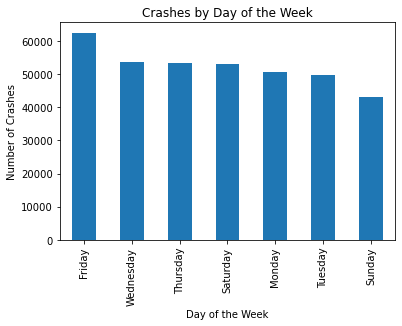

In [32]:
import matplotlib.pyplot as plt
x['ACC_DATE'] = pd.to_datetime(x['ACC_DATE'])
# extract the day of the week from the 'DATE' column
x['day_of_week'] = x['ACC_DATE'].dt.day_name()

# count the number of crashes by day of the week
crashes_by_day = x['day_of_week'].value_counts()

# create a bar chart
crashes_by_day.plot(kind='bar')
plt.title('Crashes by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Crashes')
plt.show()

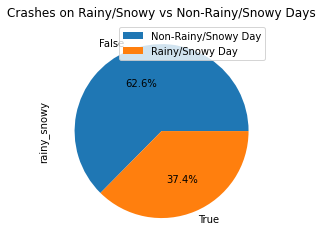

In [33]:
# count the number of crashes in rainy/snowy vs non-rainy/snowy days
crashes_by_rainy = x['rainy_snowy'].value_counts()

# create a pie chart
crashes_by_rainy.plot(kind='pie', autopct='%1.1f%%')
plt.title('Crashes on Rainy/Snowy vs Non-Rainy/Snowy Days')
plt.legend(['Non-Rainy/Snowy Day', 'Rainy/Snowy Day'])
plt.show()

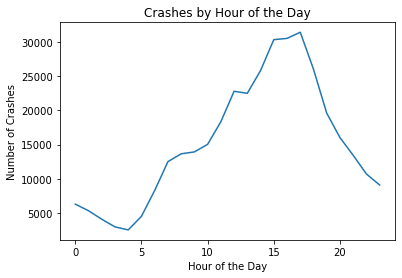

In [34]:
# extract the hour of the day from the 'ACC TIME' column
x['hour_of_day'] = pd.to_datetime(x['ACC_TIME']).dt.hour

# count the number of crashes by hour of the day
crashes_by_hour = x['hour_of_day'].value_counts().sort_index()

# create a line chart
crashes_by_hour.plot(kind='line')
plt.title('Crashes by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Crashes')
plt.show()

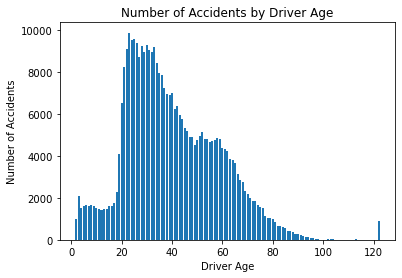

In [35]:
age_counts = x.groupby('Age')['REPORT_NO'].count()

# create a bar chart of the age counts
plt.bar(age_counts.index, age_counts.values)

# set the axis labels and title
plt.xlabel('Driver Age')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents by Driver Age')

# display the graph
plt.show()

In [36]:
x['COUNTY_DESC'].unique()

array(["Prince George's", 'Baltimore City', 'Anne Arundel', 'Baltimore',
       'Wicomico', 'Montgomery', 'Howard', "Queen Anne's", 'Frederick',
       'Carroll', 'Harford', 'Cecil', "St. Mary's", 'Worcester', 'Talbot',
       'Dorchester', 'Washington', 'Allegany', 'Charles', 'Calvert',
       'Somerset', 'Caroline', 'Garrett', 'Kent'], dtype=object)

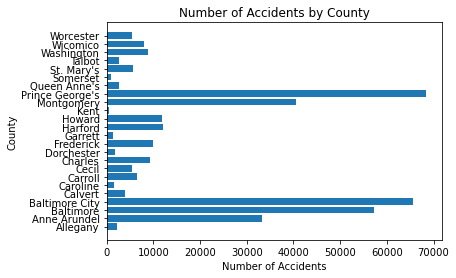

In [37]:
age_counts = x.groupby('COUNTY_DESC')['REPORT_NO'].count()

# create a bar chart of the age counts
plt.barh(age_counts.index, age_counts.values)

# set the axis labels and title
plt.ylabel('County')
plt.xlabel('Number of Accidents')
plt.title('Number of Accidents by County')

# display the graph
plt.show()

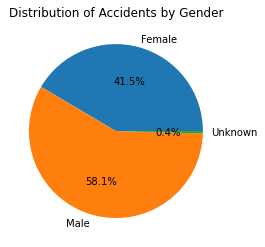

In [38]:
# group the data by gender and sum the number of accidents for each group
gender_counts = x.groupby('SEX_DESC')['REPORT_NO'].count()

# create a pie chart of the gender counts
plt.pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%')

# set the title
plt.title('Distribution of Accidents by Gender')

# display the graph
plt.show()